# Open Data Spatial Visualization

In [1]:
import pandas as pd
import numpy as np
import requests
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Fetch Data

In [55]:
CRASH_DATA_URL = "https://data.cityofchicago.org/resource/85ca-t3if.json"
FACTOR_A = "Injuries"
FACTOR_B = "Rainy Weather"

In [56]:
query = """
SELECT
    COUNT(*) AS n,
    SUM(CASE(weather_condition == "RAIN" AND injuries_total >= 1, 1, TRUE, 0)) AS a,
    SUM(CASE(weather_condition == "RAIN" AND injuries_total == 0, 1, TRUE, 0)) AS b,
    SUM(CASE(weather_condition != "RAIN" AND injuries_total >= 1, 1, TRUE, 0)) AS c,
    SUM(CASE(weather_condition != "RAIN" AND injuries_total == 0, 1, TRUE, 0)) AS d,
    (a / (a + b)) / (c / (c + d)) AS rr
WHERE date_extract_y(crash_date) >= 2015
"""

In [57]:
print("Querying dataset...")
r = requests.get(CRASH_DATA_URL, params={"$query": query})
rows = r.json()
res = rows[0]
print("Fetched result.")
pd.DataFrame(rows)

Querying dataset...
Fetched result.


,a,b,c,d,n,rr
0,3706,22086,28981,230210,286125,1.28507047389138241763


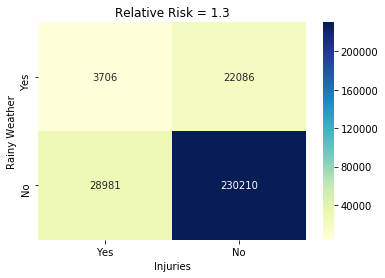

In [58]:
a = int(res["a"])
b = int(res["b"])
c = int(res["c"])
d = int(res["d"])
n = int(res["n"])
rr = float(res["rr"])
sns.heatmap(
    [[a, b], [c, d]],
    xticklabels=["Yes", "No"],
    yticklabels=["Yes", "No"],
    annot=True, fmt="d", cmap="YlGnBu"
)
plt.xlabel(FACTOR_A)
plt.ylabel(FACTOR_B)
plt.title("Relative Risk = {0:.1f}".format(rr))
plt.show()